# Convolutional Neural Network

----

### Imports

In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
import random

2.1.0


----

### Retrieving the Dataset & Preprocessing

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images  = training_images / 255.0
test_images = test_images / 255.0

# Images can be represented as an array. The images provided by the dataset are of dimensions 28x28. They need to be reshaped
# to dimensions of 28x28x1. 28x28x1 represents a grayscale image, while 28x28x3 represents a color image.
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [3]:
test_labels[0]

9

----

### Creating the Neural Network

* **Convolutional Layer:** Applies a series of convolutions that alter an image to highlight specific features.
* **Max Pooling Layer:** Passes on the features that seem to have the most value and disregards the rest.

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

----

### Viewing Model Details

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

----

### Training the Neural Network

In [6]:
model.fit(training_images, training_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4430 - accuracy: 0.8391
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2973 - accuracy: 0.8900
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2505 - accuracy: 0.9077
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2195 - accuracy: 0.9177
Epoch 5/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1929 - accuracy: 0.9275


---- 

### Evaluating the Neural Network

In [7]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.2862 - accuracy: 0.8953


[0.28618937282562257, 0.8953]

----

### Visualizing Convolutions & Pooling

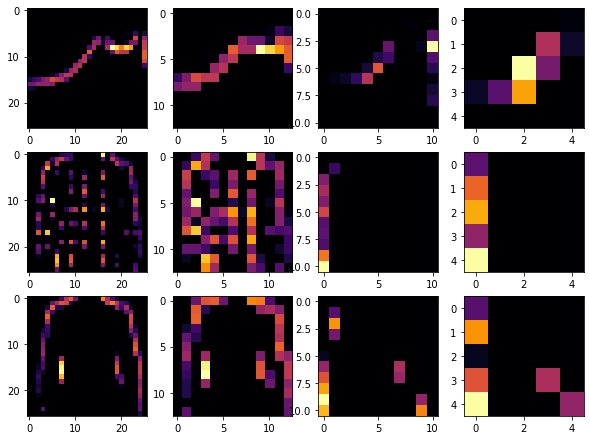

In [8]:
# Setting graph size.
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5

# Constants for displaying specified images and convolution.
IMAGES = [0, 7, 26]
CONVOLUTION_NUMBER = 1

# Creates a graph that will display a nx4 grid of sub-graphs.
fig, axs = plt.subplots(len(IMAGES), 4)

# Recreates the trained model.
layer_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Iterates through the specified images and prints a convolution heatmap 
# for the features recognized by each layer of the model.
IMAGE_NUM = 0
for IMAGE in IMAGES:
    figure = visualization_model.predict(np.expand_dims(test_images[IMAGE], axis = 0))
    for LAYER in range(0, 4):
        axs[IMAGE_NUM, LAYER].imshow(figure[LAYER][0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    IMAGE_NUM += 1


----

### Visualizing Overall Intermediate Representations

C:\Users\Dinesh Balakrishnan\anaconda3\envs\deep_learning\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


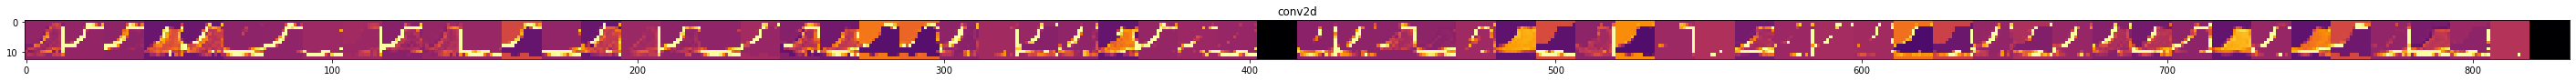

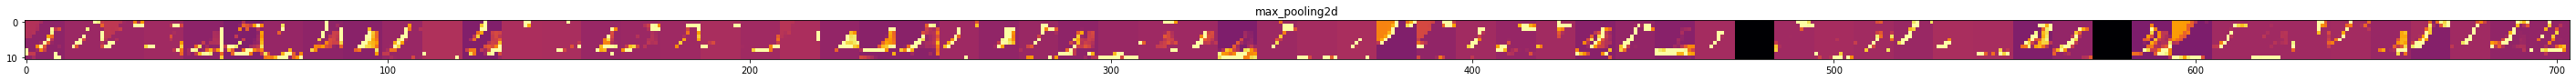

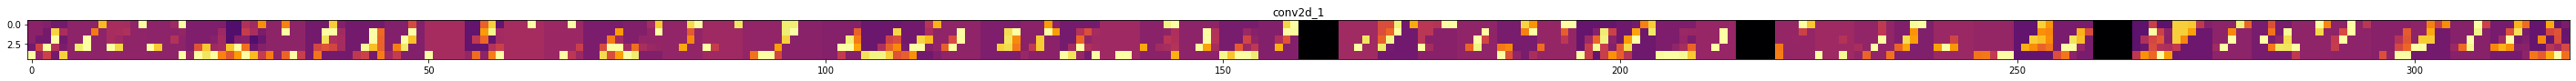

In [31]:
# Recreates the trained model.
layer_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

# Creates all features recognized by the model for an image.
img = random.choice(test_images)
layers = [layer.name for layer in model.layers]
figures = visualization_model.predict(np.expand_dims(img, axis = 0))

# Iterates through the layers of the network.
for layer_name, figure_map in zip(layers, figures):
    # Shows visualization for layers that have an image-array structure.
    if len(figure_map.shape) == 4:
        figure_count = figure_map.shape[-1]
        figure_size = figure_map.shape[1]
        # Creates a lengthy grid to represent a single layer.
        display_grid = np.zeros((figure_size, figure_size * figure_count))
        
        # Adds every image to the display grid after doing some image postprocessing.
        for index in range(figure_count):
            figure = figure_map[0, :, :, index]
            figure -= figure.mean()
            figure /= figure.std()
            figure *= 64
            figure += 128
            figure = np.clip(figure, 0, 255).astype('uint8')
            
            display_grid[:, index * figure_size : (index + 1) * figure_size] = figure
        
        # Scales and prints the final display grid.
        scale = 50. / figure_count
        plt.figure(figsize = (scale * figure_count, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'inferno')